# K-Means


The pinguins are back! Use K-Means to find groups from the penguins dataset. Do they correspond to the true labels?

In [13]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [14]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment
sns.set_style('whitegrid')

In [15]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [16]:
penguins = penguins.dropna()

In [17]:
X = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### with library

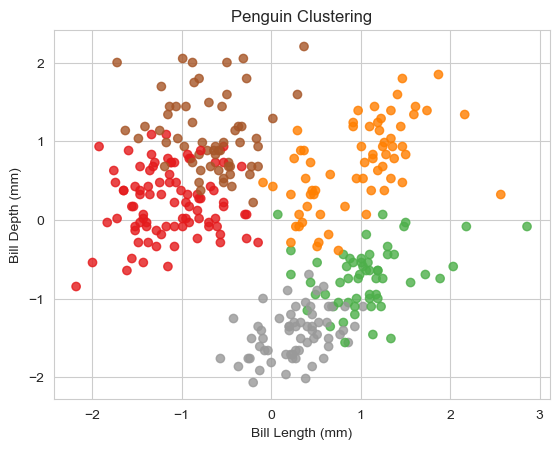

In [19]:
# Fit the KMeans model with the optimal number of clusters (e.g., 3)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Plot the data points colored by their assigned cluster label
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='Set1', alpha=0.8)
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Penguin Clustering')
plt.show()

### Without library

In [20]:
#TODO train a k-means model. What k are you looking for?

class Kmeans:
    def __init__(self, n_clusters, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state

    def fit(self, X):
        np.random.seed(self.random_state)

        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False), :]

        for i in range(self.max_iters):
            # Assign points to nearest centroid
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            self.labels = np.argmin(distances, axis=0)

            # Update centroids to mean of assigned points
            for j in range(self.n_clusters):
                self.centroids[j] = np.mean(X[self.labels == j], axis=0)

    def predict(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def score(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return -np.sum(np.min(distances, axis=0))


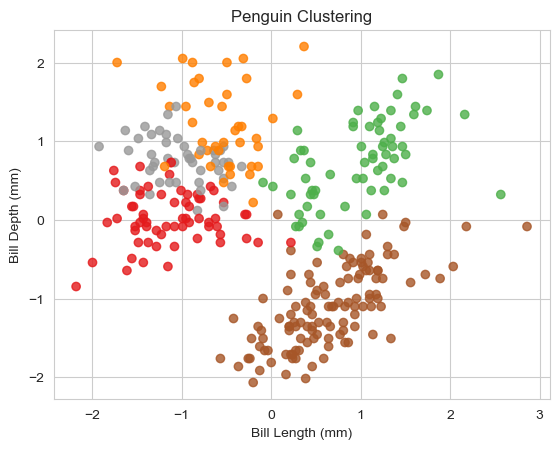

In [21]:
#Make a plot where the color is the label assigned by the clustering

kmeans = Kmeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Plot the data points colored by their assigned cluster label
plt.scatter(X[:, 0], X[:, 1], c=kmeans.predict(X), cmap='Set1', alpha=0.8)
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Penguin Clustering')
plt.show()


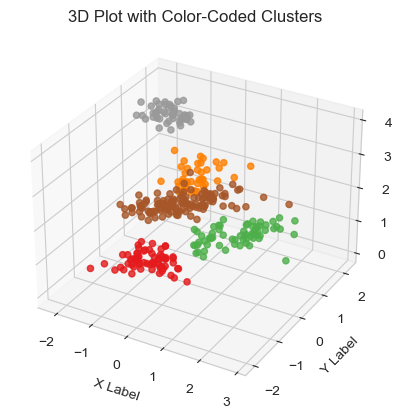

In [22]:
#Make a 3D plot where the color is the label assigned by the clustering

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points with color-coded labels
ax.scatter(X[:, 0], X[:, 1], kmeans.predict(X), c=kmeans.predict(X), cmap='Set1', alpha=0.8)

# Add labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Cluster Label')
ax.set_title('3D Plot with Color-Coded Clusters')

# Show plot
plt.show()


In [23]:
#TODO To which label each class correspond? Search about scipy linear_sum_assignment
#It is an optimization problem.
#Show the table

nc=3

np.random.seed(2018)
kmeans = KMeans(nc, n_init=10)
c1 = kmeans.fit(X).cluster_centers_
z1 = kmeans.predict(X)
c2 = kmeans.fit(X).cluster_centers_
z2 = kmeans.predict(X)
zs = [z1, z2]
cs = [c1, c2]



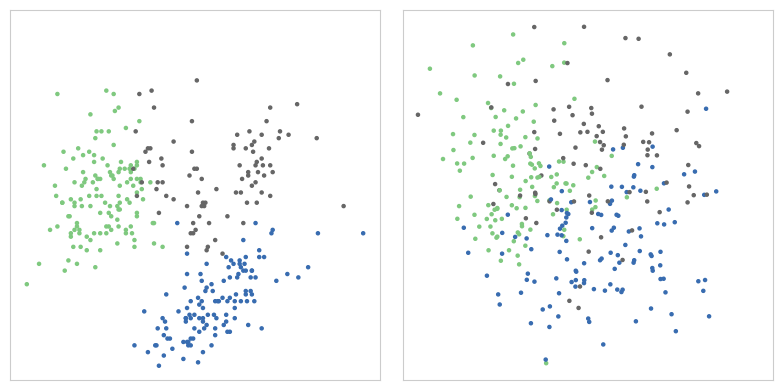

In [24]:
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

X1 = X + np.random.normal(0, 1, X.shape)

cost = cdist(c1, c2)

row_ind, col_ind = linear_sum_assignment(cost)

z1_aligned = col_ind[z1]
zs = [z1_aligned, z2]

plt.figure(figsize=(8, 4))
for i, xs in enumerate([X, X1]):
    plt.subplot(1,2,i+1)
    plt.scatter(xs[:, 0], xs[:, 1], s=5, c=zs[i],
                cmap=plt.cm.get_cmap('Accent', nc))
    plt.xticks([])
    plt.yticks([])
    plt.axis('square')
plt.tight_layout()
pass

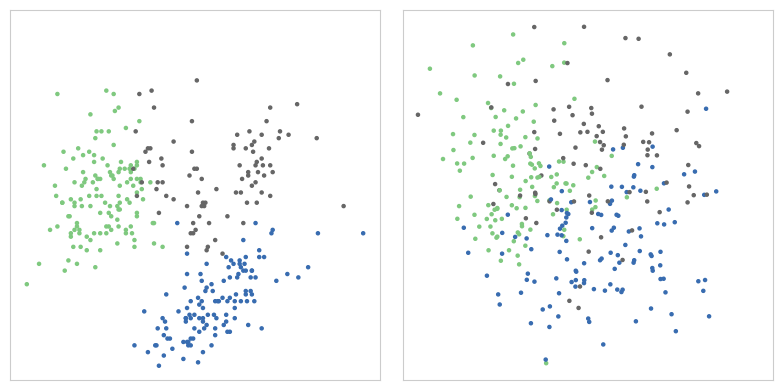

In [25]:
plt.figure(figsize=(8, 4))
for i, xs in enumerate([X, X1]):
    plt.subplot(1,2,i+1)
    z = zs[i]
    c = cs[i]
    plt.scatter(xs[:, 0], xs[:, 1], s=5, c=z,
                cmap=plt.cm.get_cmap('Accent', nc))
    plt.xticks([])
    plt.yticks([])
    plt.axis('square')
plt.tight_layout()
pass

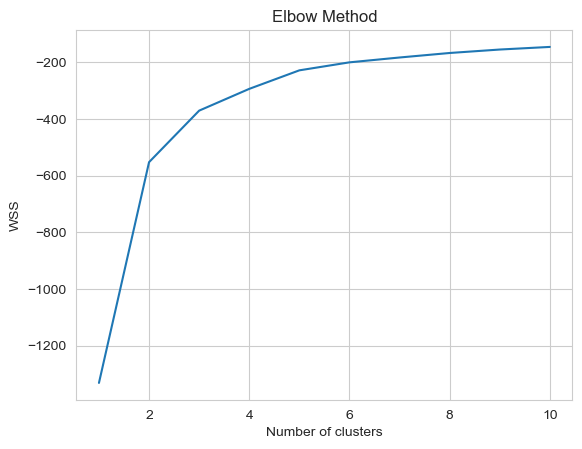

In [26]:
#TODO Do the elbow method for different k's

# Implement the elbow method
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wss.append(kmeans.score(X))

# Plot the WSS values against the number of clusters
plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [27]:
#TODO train 1000 models, with random initialization. Plot the results of the losses

losses=[]
best_loss = float('inf')
best_iteration = None

for i in range(1000):
    kmeans = KMeans(n_clusters=4, init='random', n_init=1, random_state=i)
    kmeans.fit(X)
    losses.append(kmeans.inertia_)
    loss = kmeans.inertia_
    if loss < best_loss:
        best_loss = loss
        best_iteration = i
    print(f'Iteration {i+1}: loss = {loss}')

print(f'\nBest loss = {best_loss} achieved in iteration {best_iteration+1}.')


Iteration 1: loss = 293.9047510208859
Iteration 2: loss = 295.403389204556
Iteration 3: loss = 293.9047510208859
Iteration 4: loss = 305.36891783093444
Iteration 5: loss = 295.1413578898964
Iteration 6: loss = 305.43416342825077
Iteration 7: loss = 305.36891783093444
Iteration 8: loss = 305.36891783093444
Iteration 9: loss = 305.36891783093444
Iteration 10: loss = 305.36785432234376
Iteration 11: loss = 340.687155731526
Iteration 12: loss = 294.0276559695989
Iteration 13: loss = 305.43416342825077
Iteration 14: loss = 305.43416342825077
Iteration 15: loss = 295.403389204556
Iteration 16: loss = 305.36891783093444
Iteration 17: loss = 305.36891783093444
Iteration 18: loss = 293.9047510208859
Iteration 19: loss = 341.6155594113153
Iteration 20: loss = 293.9047510208859
Iteration 21: loss = 293.9047510208859
Iteration 22: loss = 305.43416342825077
Iteration 23: loss = 340.43257673388916
Iteration 24: loss = 341.25655677252365
Iteration 25: loss = 293.9047510208859
Iteration 26: loss = 305

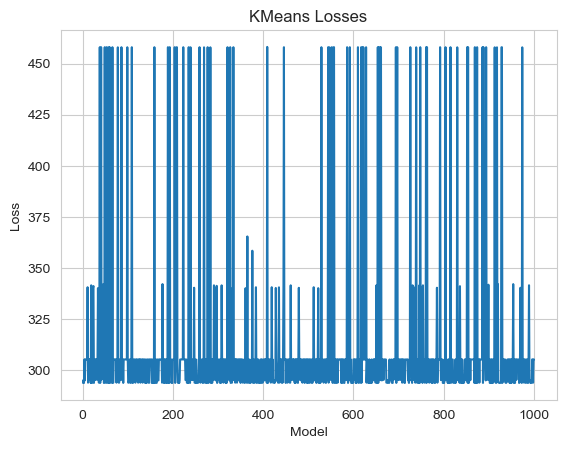

In [28]:
plt.plot(range(1, 1001), losses)
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('KMeans Losses')
plt.show()


Iteration 1: loss = 370.76614351350696
Iteration 2: loss = 370.76614351350696
Iteration 3: loss = 370.76614351350696
Iteration 4: loss = 370.76614351350696
Iteration 5: loss = 370.76614351350696
Iteration 6: loss = 370.76614351350696
Iteration 7: loss = 370.76614351350696
Iteration 8: loss = 370.76614351350696
Iteration 9: loss = 370.76614351350696
Iteration 10: loss = 370.76614351350696
Iteration 11: loss = 370.76614351350696
Iteration 12: loss = 370.76614351350696
Iteration 13: loss = 370.76614351350696
Iteration 14: loss = 370.76614351350696
Iteration 15: loss = 370.76614351350696
Iteration 16: loss = 370.76614351350696
Iteration 17: loss = 370.76614351350696
Iteration 18: loss = 370.76614351350696
Iteration 19: loss = 370.76614351350696
Iteration 20: loss = 370.76614351350696
Iteration 21: loss = 370.76614351350696
Iteration 22: loss = 370.76614351350696
Iteration 23: loss = 370.76614351350696
Iteration 24: loss = 370.76614351350696
Iteration 25: loss = 370.76614351350696
Iteration

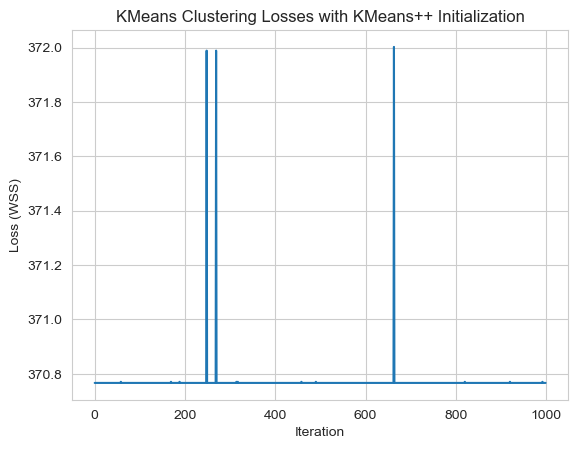

In [29]:
#TODO train 1000 models, with a better initialization. Plot the results of the losses

import warnings
warnings.filterwarnings('ignore')

# Train 1000 models with KMeans++
losses = []
for i in range(1000):
    kmeans = KMeans(n_clusters=3, init='k-means++')
    kmeans.fit(X)
    loss = -kmeans.score(X)
    if loss < best_loss:
        best_loss = loss
        best_iteration = i
    print(f'Iteration {i+1}: loss = {loss}')
    losses.append(loss)


print(f'\nBest loss = {best_loss} achieved in iteration {best_iteration+1}.')

# Plot the losses
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss (WSS)')
plt.title('KMeans Clustering Losses with KMeans++ Initialization')
plt.show()


We have already seen the K-Means class. We know that it can help us to reduce dimensionality and understand how the data behave. We can use it for finding groups and classify them. Now, we are going to use it to do image segmentation.  

What do you think are the data points?  
How can we evaluate each point?  
How is different an image from a normal matrix of data?  

We are going to use RGB images. They have three channels and we must take those into account while computing the groups.

<img src="three_d_array.png" alt="three_d_array" width="300"/>

This time, you will have to implement K-Means by hand, do not use the sklearn. How can you define the centroids?

In [32]:
#Import libraries
from skimage import io
from skimage import color

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
%matplotlib inline
import requests

In [33]:
#Download image. Feel free to change the image. Remember that we are working with RGB images.
url = "https://www.rainforest-alliance.org/wp-content/uploads/2021/06/poison-dart-frog-thumb-1-400x400.jpg"
img_data = requests.get(url).content
with open('image.jpg', 'wb') as handler:
    handler.write(img_data)
img = io.imread("image.jpg")

(-0.5, 399.5, 399.5, -0.5)

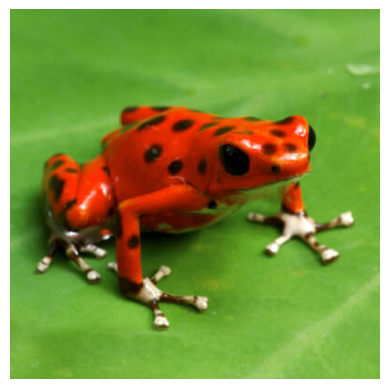

In [34]:
#Show image
plt.imshow(img)
plt.axis("off")

In [35]:
#Check the shape of the image. If there are more or less channels, we might have an image in another format
img.shape

(400, 400, 3)

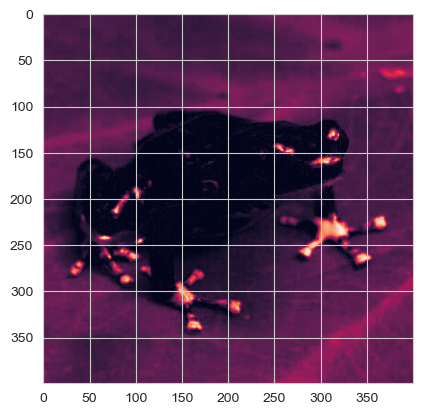

In [39]:
#Show just the blue channel
plt.imshow(img[:,:,2])

In [52]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method for computing the new centroids. The parameters are:
#     - centroids. Current centroids.
#     - data. data[0] will contain the image
#             data[1] will contain the current label or centroid
# Returns the new centroids. The data and labels do not change.

def compute_centroids(centroids, data):
    # For each centroid, calculate the new center by finding the mean of the data points in each channel
    new_centroids = {}
    centroid_pixels = {}
    for i, centroid in enumerate(centroids.values()):
        mask = data[1] == i
        pixels = data[0][mask]
        centroid_pixels[i] = pixels
        new_centroids[i] = np.mean(pixels, axis=0)
    return new_centroids, centroid_pixels


In [ ]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method for assigning the points to a new centroid. The parameters are:
#     - centroids. Current centroids.
#     - data. data[0] will contain the image
#             data[1] will contain the current label or centroid
# Returns the new labels. The points are assigned based on Euclidean distance.
def assign(centroids, data):
    # Assign each pixel to the closest centroid using the new centroids
    labels = np.zeros((data[0].shape[0], data[0].shape[1]))
    for i in range(data[0].shape[0]):
        for j in range(data[0].shape[1]):
            distances = np.sqrt(np.sum((data[0][i, j, :] - np.array(list(centroids.values())))**2, axis=1))
            labels[i, j] = np.argmin(distances)
    return labels

In [53]:
import numpy as np


def k_means(k, image):
    # Generate the centroids. Randomly. Our centroids are three dimensional.
    centroids = {i: np.random.randint(255, size=(3,)) for i in range(k)}
    labels = np.zeros((image.shape[0], image.shape[1]))
    data = (image, labels)
    # Run the K-Means algorithm until convergence
    while True:
        # Compute the new centroids and centroid pixels
        new_centroids, centroid_pixels = compute_centroids(centroids, data)
        # Assign each pixel to the closest centroid using the new centroids
        new_labels = assign(new_centroids, data)
        # If the labels have not changed, the algorithm has converged
        if np.array_equal(new_labels, labels):
            break
        # Otherwise, update the labels and centroids and repeat
        labels = new_labels
        centroids = new_centroids
    # Map the labels to the centroid pixels to get the segmented image
    new_i = np.zeros_like(image)
    for i in range(k):
        mask = labels == i
        new_i[mask] = new_centroids[i]
    return new_i

In [54]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method that implements K-Means. The parameters are:
#     - k. The problem with K-Means is that it needs a hyperparameter k, selected by the user.
#     - image. 
#Returns a segmented image.
def k_means(k, image):
    # Generate the centroids. Randomly. Our centroids are three dimensional.
    centroids = {i: np.random.randint(255, size=(3,)) for i in range(k)}
    labels = np.zeros((image.shape[0], image.shape[1]))
    data = (image, labels)
    # Run the K-Means algorithm until convergence
    while True:
        # Compute the new centroids and centroid pixels
        new_centroids, centroid_pixels = compute_centroids(centroids, data)
        # Assign each pixel to the closest centroid using the new centroids
        new_labels = assign(new_centroids, data)
        # If the labels have not changed, the algorithm has converged
        if np.array_equal(new_labels, labels):
            break
        # Otherwise, update the labels and centroids and repeat
        labels = new_labels
        centroids = new_centroids
    # Map the labels to the centroid pixels to get the segmented image
    new_i = np.zeros_like(image)
    for i in range(k):
        mask = labels == i
        new_i[mask] = new_centroids[i]
    return new_i


In [ ]:
# Get 8 new images, with a different number of clusters
images = []
for k in range(1, 9):
    images.append(k_means(k, img))
    plt.imshow(images[-1])
    plt.title(f'Segmented image with {k} clusters')
    plt.show()

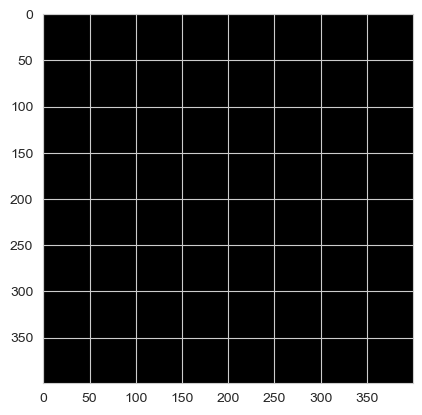

In [50]:
plt.imshow(k_means(2,img))

### Segment an image with K-means

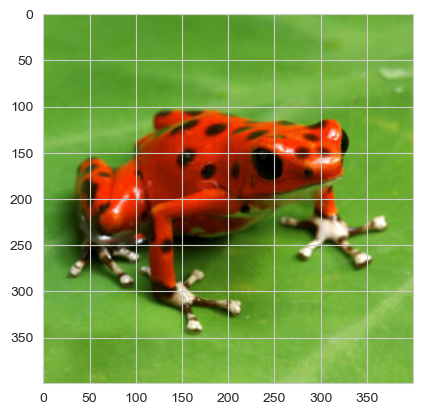

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
# Read in the image
image = cv2.imread('image.jpg')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

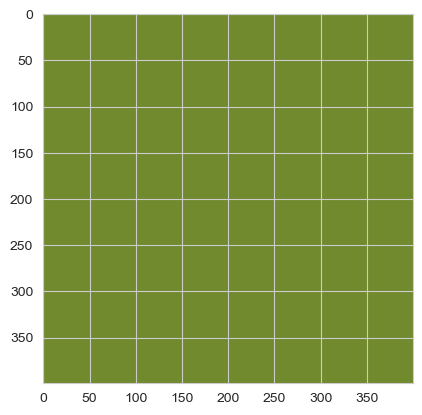

In [70]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 1

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

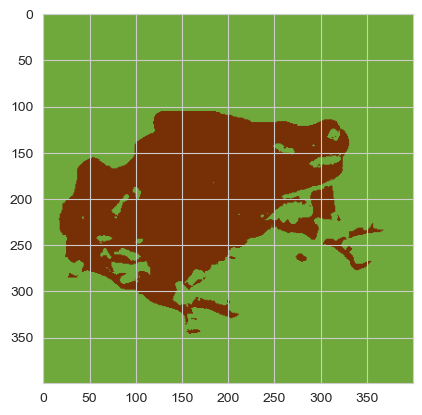

In [71]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 2

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

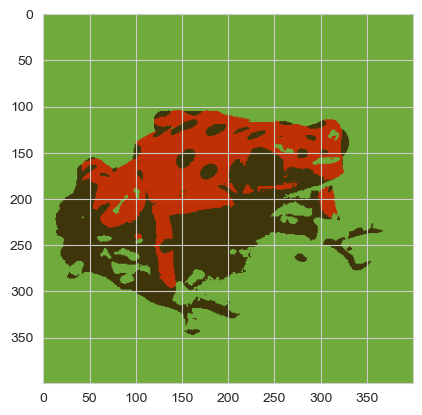

In [72]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 3

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

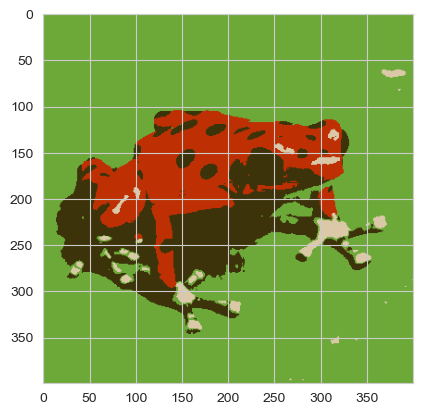

In [73]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 4

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

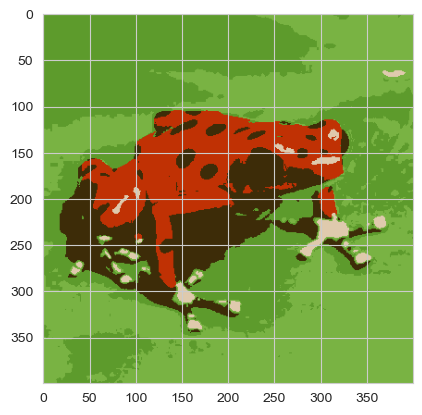

In [74]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 5

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

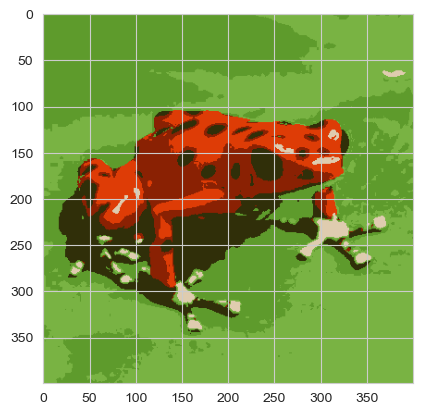

In [75]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 6

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

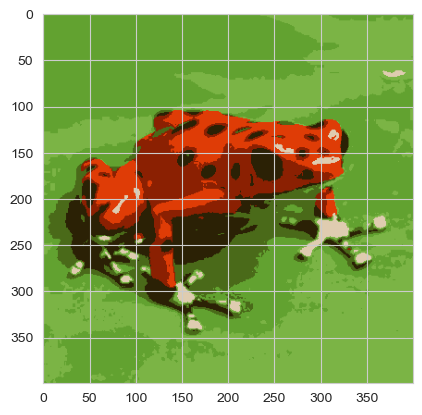

In [76]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 7

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

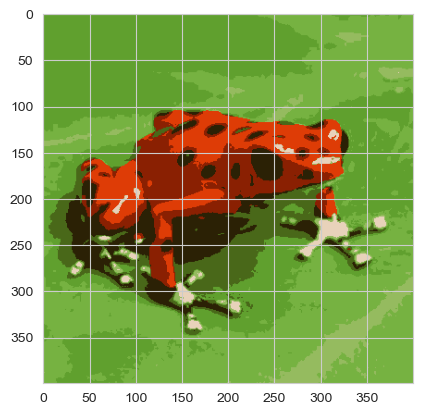

In [77]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 8

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

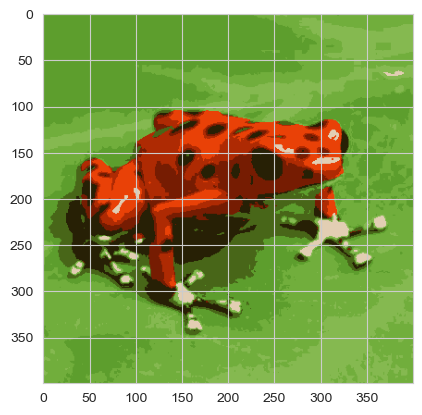

In [79]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 9

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

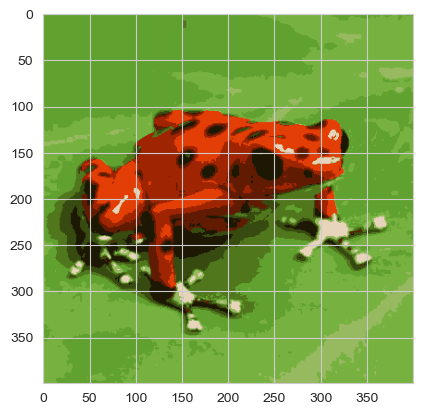

In [80]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 10

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

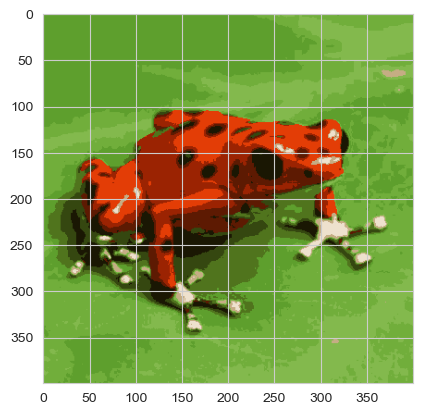

In [81]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 11

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

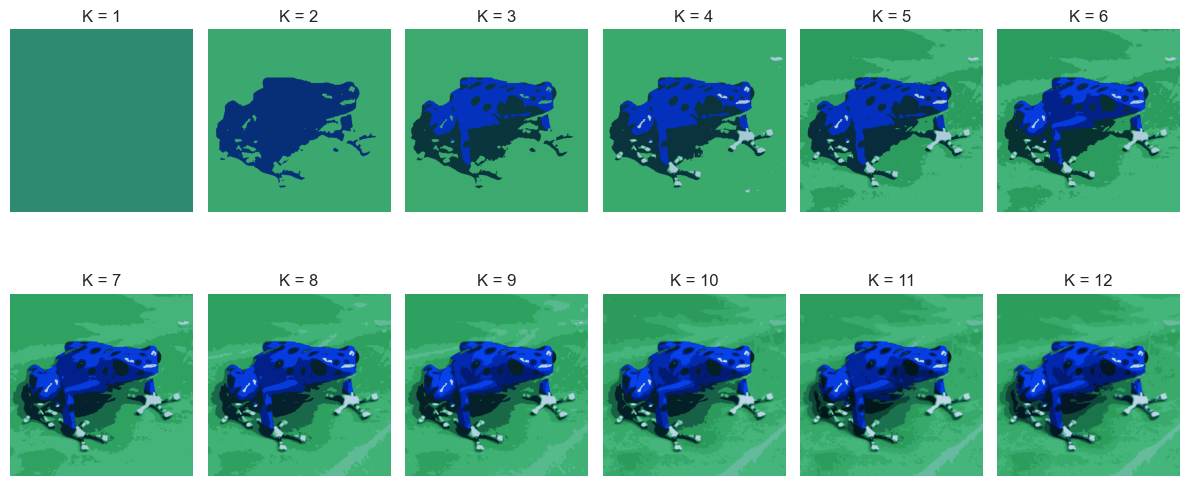

In [67]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("image.jpg")

# Reshape the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

# Define the criteria for the algorithm to stop running
#criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Define the range of values of K to test
k_range = range(1, 13)

# Create a grid of subplots to display the segmented images
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12, 6))

# Iterate over the values of K and display the segmented image in each subplot
for k, ax in zip(k_range, axes.flatten()):
    # Perform K-means clustering
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    
    # Reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    
    # Display the segmented image in the subplot
    ax.imshow(segmented_image)
    ax.set_title(f"K = {k}")
    ax.axis("off")

plt.tight_layout()
plt.show()
